#  Transaction Fraud Detection Model
**Steven Weeden, Danny Phan, Michael Lleverino** 

## Project Summary

For this project, we are leveraging a synthetic dataset of financial transactions designed for fraud detection to help us produce a fraud detection model. We will do this by finding patterns between fraudulent and legitmate transactions and using that data to determine if future transactions are legit.

## Problem Statement 

This project focuses on developing machine learning models to detect fraud using a realistic, synthetic financial transaction dataset.


The goal of this project is to build a machine learning model that helps predict if a transaction is considered fradulent or legitimate. We will achieve this by analyzing the transaction data to find anomolies and patterns.

We will use logistical regression as our benchmark. This is a simple model to produce and will provide insight on wheater this has a linear or non-linear approach.

This data comes from Kaggle and contains millions of lines of transaction data. We plan on using our benchmark as a comparaison in preformance between models. 

Our goal is to make a successful machine learning model that can successfully and accuratly predict whether or not a transaction is considered fradulent.



In [1]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/synthetic_fraud_data.csv")

df.head()

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,...,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820+00:00,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,0,False,0,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464+00:00,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,1,True,0,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762+00:00,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,0,False,0,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466+00:00,Gas,major,Exxon,630.60,AUD,Australia,...,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,0,False,0,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063+00:00,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,1,False,0,False,"{'num_transactions': 218, 'total_amount': 4827...",True


## Dataset 
The shape of our dataset is (7483766, 24) which totales to 179,610,384 entries within this dataset. 

Our attributes include transaction_id, customer_id, card_number, timestamp, merchant_category, merchant_type, merchant, amount, currency, country, city, city_size, card_type, card_present, device,channel, device_fingerprint, ip_address, distance_from_home, high_risk_merchant, transaction_hour, weekend_transaction, velocity_last_hour, is_fraud


* Description:
    * 1.  Transaction ID: Unique identifiers for each transaction. Useful for referencing individual transactions.
    * 2.  Customer ID: Unique identifiers for each customers. Useful for keeping track of customer activity and behavior across transactions.
    * 3.  Card Number: A masked card number representing the credit or debit card used.
    * 4.  Timestamp: Time in UTC format indicating when the transaction occured. Helpful for indicating when and how often the card was used.
    * 5.  Merchant Category: High-level category for merchants, such as 'Retail' or 'Travel'.
    * 6.  Merchant Type: Specifies the subtype of merchants within each category, such as 'Online' or 'Retail'.
    * 7.  Merchant: The name of the merchant where the transaction took place.
    * 8.  Amount: The amout of money spent at that merchant, local to the transaction's country.
    * 9.  Currency: Currency code (e.g., USD, EUR) used for the transaction.
    * 10. Country: Country where the transaction took place, could be used for detecting trends.
    * 11. City: Name of the city where the transaction was made.
    * 12. City Size: Classification of the city size (e.g., large, medium).
    * 13. Card Type: Type of card used in the transaction, such as 'Gold Credit' or 'Basic Debit'.
    * 14. Card Present: Boolean values indicating if the card was physically present during the transaction, could be important for differentiating between in-person and online transactions.
    * 15. Device: Types device or browser used for the transaction (e.g., Chrome, iOS App).
    * 16. Channel: Types of transaction channel (web, mobile, pos).
    * 17. Device Fingerprint: Unique identifier for the device used, generated using hashing.
    * 18. IP Address: The IP address used in the transaction, simulated for privacy concerns.
    * 19. Distance From Home: Binary indicating whether the transaction occurred outside the customer's home country.
    * 20. High Risk Merchant: Boolean values that indicates higher-risk merchant categories (e.g., Travel, Entertainment).
    * 21. Transaction Hour: The hours between (0-23) of when the transaction occurred.
    * 22. Weekend Transaction: Boolean values indicating whether or not the transaction occurred on a weekend.
    * 23. Velocity Last Hour: Dictionary of velocity metrics within the past hour, including: num_transactions: Number of customer transactions in the last hour. total_amount: Total amount spent in the last hour. unique_merchants: Count of unique merchants in the last hour. unique_countries: Count of unique countries in the last hour. max_single_amount: Maximum single transaction amount in the last hour.
    * 24. Is Fraud : Binary label for fraud status (True/False).


* What Processing Tools have you used.  Why?  Add final images from jupyter notebook. Use questions from 3.4 of the [Datasheets For Datasets](https://arxiv.org/abs/1803.09010) paper for a guide.>

When cleaning and labeling our initial dataframe, we first checked out entire dataset for any missing or null values, which came out to no missing values. Next, we sampled 250,000 rows into a new dataframe to help decrease computation time, resource use, and preserve the original  'df' dataset. Then, we dropped useless columns such as 'transaction_id', 'customer_id', and 'card_number' because they had no real correlation to our dataset. After, we parsed 'num_transactions', 'total_amount', 'unique_merchants', 'unique_countries', and 'max_single_amount' from 'velocity_last_hour' as it contained a string that represents a dictionary. 

Lastly, we label encoded multiple different columns to encode categorical features into our dataframe and converted binary columns into binary categorical features.

All of our cleaning and labeling process used the Pandas and SKLearn libraries which both can be installed using PIP or Conda.

In [2]:
print(df.shape)
print(df.size)

(7483766, 24)
179610384


In [3]:
null_sum = df.isnull().sum()
print(null_sum)

transaction_id         0
customer_id            0
card_number            0
timestamp              0
merchant_category      0
merchant_type          0
merchant               0
amount                 0
currency               0
country                0
city                   0
city_size              0
card_type              0
card_present           0
device                 0
channel                0
device_fingerprint     0
ip_address             0
distance_from_home     0
high_risk_merchant     0
transaction_hour       0
weekend_transaction    0
velocity_last_hour     0
is_fraud               0
dtype: int64


Sample the data because of the large dataset

In [4]:
sample = df.sample(n = 250000, random_state = 21).reset_index(drop = True)
sample.head()

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,...,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
0,TX_b5b17800,CUST_46478,5699657752967952,2024-10-07 17:14:22.181495+00:00,Entertainment,streaming,Spotify,169.37,EUR,Germany,...,Firefox,web,ce7db67743bf5fffdfa5b2ecfb4e6de0,140.170.128.51,0,True,17,False,"{'num_transactions': 27, 'total_amount': 25271...",False
1,TX_9c391f0e,CUST_49102,371384150413036,2024-10-16 14:20:16.817017+00:00,Restaurant,premium,Ruth's Chris,823.67,CAD,Canada,...,Chrome,web,d654a7f29023652d55a4574b8fc6ea4a,45.93.44.23,0,False,14,False,"{'num_transactions': 437, 'total_amount': 1567...",False
2,TX_c006b556,CUST_60071,379239643871947,2024-10-30 16:30:10.768556+00:00,Entertainment,streaming,Spotify,21948.66,RUB,Russia,...,Safari,web,6d945d3387a7d9eb150ec7d30bd3d621,52.255.14.155,0,True,16,False,"{'num_transactions': 6, 'total_amount': 340463...",False
3,TX_1ec4e8e0,CUST_85188,6915403402912841,2024-10-03 08:21:32.928515+00:00,Healthcare,medical,Lab Corp,1602.46,NGN,Nigeria,...,Edge,web,4af6ed569634c7b9311dc6968b50e29e,65.194.56.96,1,False,8,False,"{'num_transactions': 944, 'total_amount': 2583...",True
4,TX_6b0f6cba,CUST_12828,376941479073646,2024-10-08 22:41:26.566924+00:00,Restaurant,casual,Applebee's,89.80,SGD,Singapore,...,Firefox,web,fcaf3544fe07e389572c90dc02921857,193.111.77.221,0,False,22,False,"{'num_transactions': 148, 'total_amount': 2367...",False


Finding if any columns in data have high percentage of nulls

Dropping columns that will serve no assistance in determining if transaction is fraud or not

In [5]:
sample.drop(['transaction_id', 'customer_id', 'card_number'], axis = 1, inplace = True)

Get key values from velocity_last_hour column and makes them all columns in the dataframe

In [6]:

import ast

parsed_data = []
for value in sample['velocity_last_hour']:
    try:
        parsed_data.append(ast.literal_eval(value) if isinstance(value, str) else value)
    except (ValueError, SyntaxError):
        parsed_data.append({
            'num_transactions': None,
            'total_amount': None,
            'unique_merchants': None,
            'unique_countries': None,
            'max_single_amount': None
        })

sample['num_transactions'] = [int(item.get('num_transactions', 0)) for item in parsed_data]
sample['total_amount'] = [float(item.get('total_amount', 0)) for item in parsed_data]
sample['unique_merchants'] = [int(item.get('unique_merchants', 0)) for item in parsed_data]
sample['unique_countries'] = [int(item.get('unique_countries', 0)) for item in parsed_data]
sample['max_single_amount'] = [float(item.get('max_single_amount', 0)) for item in parsed_data]

sample.drop('velocity_last_hour', axis = 1, inplace = True)

In [7]:
pd_categorical = sample.copy()
pd_categorical

,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,...,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,is_fraud,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount
0,2024-10-07 17:14:22.181495+00:00,Entertainment,streaming,Spotify,169.37,EUR,Germany,Unknown City,medium,Premium Debit,...,0,True,17,False,False,27,2.527161e+06,21,6,1.897486e+06
1,2024-10-16 14:20:16.817017+00:00,Restaurant,premium,Ruth's Chris,823.67,CAD,Canada,Unknown City,medium,Platinum Credit,...,0,False,14,False,False,437,1.567628e+07,102,12,1.491427e+06
2,2024-10-30 16:30:10.768556+00:00,Entertainment,streaming,Spotify,21948.66,RUB,Russia,Unknown City,medium,Gold Credit,...,0,True,16,False,False,6,3.404636e+05,6,5,2.592671e+05
3,2024-10-03 08:21:32.928515+00:00,Healthcare,medical,Lab Corp,1602.46,NGN,Nigeria,Unknown City,medium,Premium Debit,...,1,False,8,False,True,944,2.583898e+07,105,12,1.871011e+06
4,2024-10-08 22:41:26.566924+00:00,Restaurant,casual,Applebee's,89.80,SGD,Singapore,Unknown City,medium,Basic Debit,...,0,False,22,False,False,148,2.367273e+06,71,11,6.834904e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2024-10-25 11:39:56.100159+00:00,Restaurant,casual,Olive Garden,513136.06,NGN,Nigeria,Unknown City,medium,Platinum Credit,...,0,False,11,False,False,130,6.631012e+07,72,9,1.217103e+06
249996,2024-09-30 08:05:52.579982+00:00,Grocery,online,Instacart,925.19,SGD,Singapore,Unknown City,medium,Premium Debit,...,1,False,8,False,True,883,3.013310e+07,105,12,5.691281e+06
249997,2024-10-16 08:08:32.574226+00:00,Education,online,Coursera,425.03,USD,USA,Dallas,medium,Basic Credit,...,1,False,8,False,False,279,1.766999e+07,95,12,2.881764e+06
249998,2024-10-29 10:36:25.543460+00:00,Retail,physical,IKEA,27.31,MXN,Mexico,Unknown City,medium,Basic Debit,...,1,False,10,False,True,98,3.765429e+06,64,12,1.798893e+06


Converted all Categorical Data to Numerical

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_encode = ['merchant_type', 'merchant', 'currency', 'city', 'city_size', 'card_present', 'channel', 'high_risk_merchant', 'weekend_transaction', 'is_fraud']
sample[columns_to_encode] = sample[columns_to_encode].apply(lambda col: le.fit_transform(col).astype('int64'))

In [9]:
binary_cols = ['card_present', 'high_risk_merchant', 'weekend_transaction', 'is_fraud']

for col in binary_cols:

    sample[col] = sample[col].map({

        1: 1, 'yes': 1, 'Yes': 1, 'True': 1, True: 1,

        0: 0, 'no': 0, 'No': 0, 'False': 0, False: 0

    }).astype(int)


for col in binary_cols:

    print(f"\n{col} value counts:")

    print(sample[col].value_counts())

    print(f"Unique values: {sorted(sample[col].unique())}")

sample.head()


card_present value counts:
card_present
0    228336
1     21664
Name: count, dtype: int64
Unique values: [0, 1]

high_risk_merchant value counts:
high_risk_merchant
0    187504
1     62496
Name: count, dtype: int64
Unique values: [0, 1]

weekend_transaction value counts:
weekend_transaction
0    185669
1     64331
Name: count, dtype: int64
Unique values: [0, 1]

is_fraud value counts:
is_fraud
0    200331
1     49669
Name: count, dtype: int64
Unique values: [0, 1]


,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,...,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,is_fraud,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount
0,2024-10-07 17:14:22.181495+00:00,Entertainment,14,79,169.37,3,Germany,10,1,Premium Debit,...,0,1,17,0,0,27,2.527161e+06,21,6,1.897486e+06
1,2024-10-16 14:20:16.817017+00:00,Restaurant,13,72,823.67,2,Canada,10,1,Platinum Credit,...,0,0,14,0,0,437,1.567628e+07,102,12,1.491427e+06
2,2024-10-30 16:30:10.768556+00:00,Entertainment,14,79,21948.66,8,Russia,10,1,Gold Credit,...,0,1,16,0,0,6,3.404636e+05,6,5,2.592671e+05
3,2024-10-03 08:21:32.928515+00:00,Healthcare,9,49,1602.46,7,Nigeria,10,1,Premium Debit,...,1,0,8,0,1,944,2.583898e+07,105,12,1.871011e+06
4,2024-10-08 22:41:26.566924+00:00,Restaurant,2,9,89.80,9,Singapore,10,1,Basic Debit,...,0,0,22,0,0,148,2.367273e+06,71,11,6.834904e+05


In [10]:
sample.dtypes

timestamp               object
merchant_category       object
merchant_type            int64
merchant                 int64
amount                 float64
currency                 int64
country                 object
city                     int64
city_size                int64
card_type               object
card_present             int64
device                  object
channel                  int64
device_fingerprint      object
ip_address              object
distance_from_home       int64
high_risk_merchant       int64
transaction_hour         int64
weekend_transaction      int64
is_fraud                 int64
num_transactions         int64
total_amount           float64
unique_merchants         int64
unique_countries         int64
max_single_amount      float64
dtype: object

## Exploratory Data Analysis 


The EDA graphs we are planning to use histograms, box plots, line graphs, and a correlation heatmap as well. We plan to use histograms to visualize the distribution of transaction accounts to see if fraud occurs more in a certain amount. Box plots will be used to find outliers and variations in features and help us find patterns between fraudulent and non fraudulent transactions. Line graphs will help us use line graphs to identify patterns or spikes in fraud over time. Lastly we will be using a correlation heatmap to evaluate the relationship between numerical features and identify strong correlations that may indicate fraud.



* Describe the methods you explored (usually algorithms, or data wrangling approaches). 
  * First we determined how many of our transactions in our dataset were real versus fradulent. This helped determine the balance of our data for future balance scaling.
  * We then checked to see how other features correlated with the 'is_fraud' such as 'distance_from_home', 'transaction_hour', 'country', and many other columns to get an idea of what features we want to use for our model.

* Justify methods for feature normalization selection and the modeling approach you are planning to use.
  * First, since we have a highly imbalanced data set between fruad and real, we will use SMOTE to help balance the data.
  * Next, since the ranges of our values vary greatly, we will also use a scaler to help scale our data ranges.
  * Lastly, our data is non-linear and has a binary result between being marked fraud or real. Therefore, we will aim towards using a binary classification model such as random forest or XGBoost.


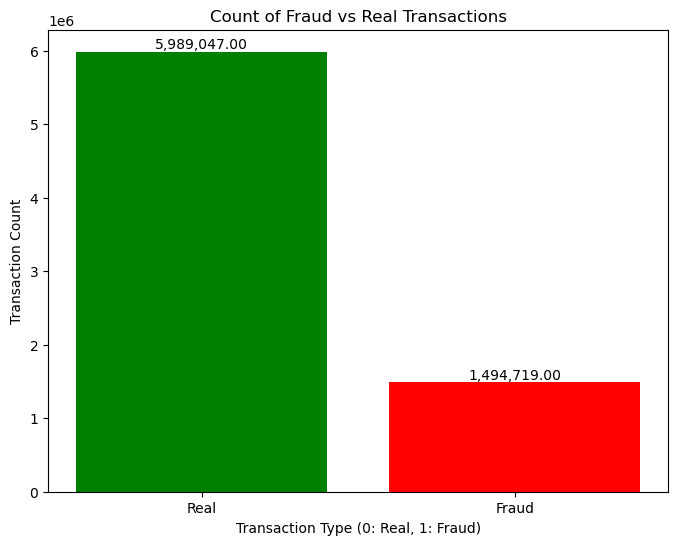

In [11]:
fraud_vs_real = df['is_fraud'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(fraud_vs_real.index, fraud_vs_real, color=['green', 'red'])

plt.title('Count of Fraud vs Real Transactions')
plt.xlabel('Transaction Type (0: Real, 1: Fraud)')
plt.ylabel('Transaction Count')
plt.xticks([0, 1], ['Real', 'Fraud'], rotation=0)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:,.2f}', 
             ha='center', va='bottom', fontsize=10)

plt.show()

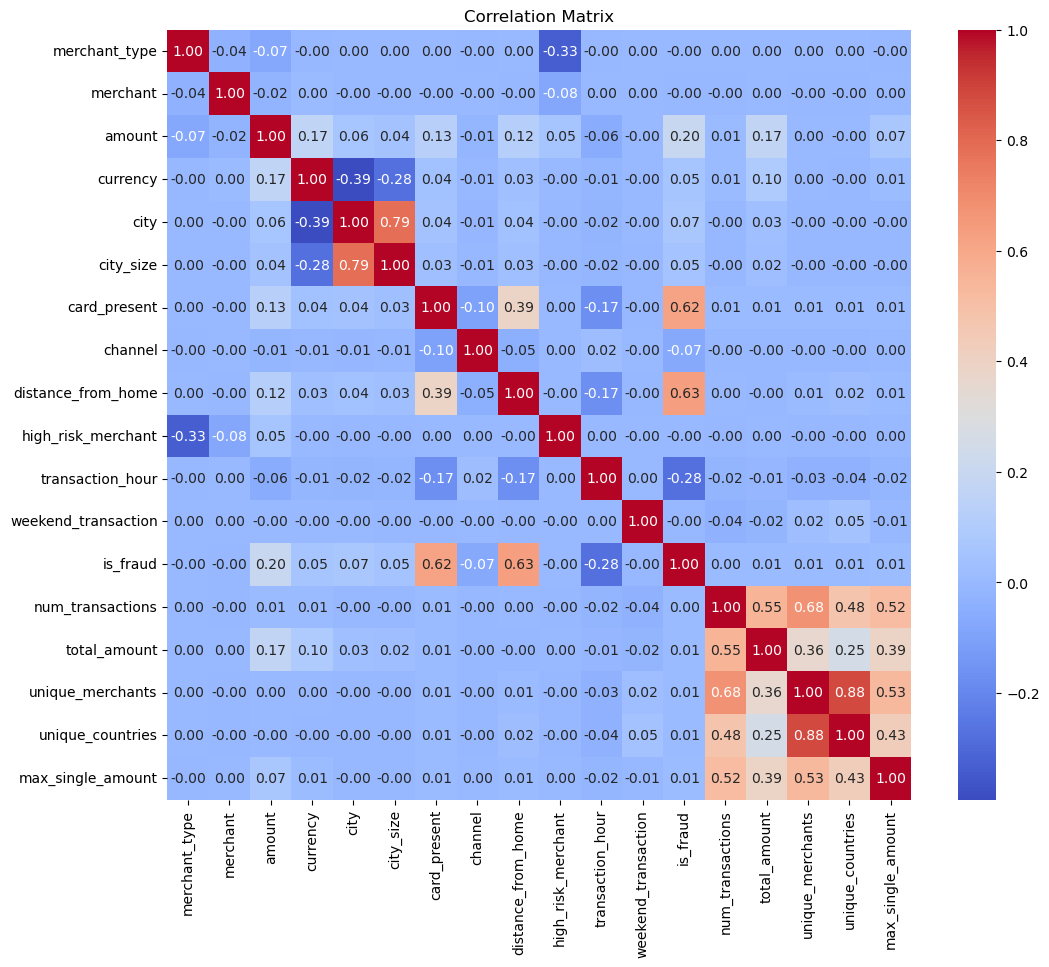

In [12]:
numerical_columns = sample.select_dtypes(include=['float64', 'int64', 'int32']).columns.tolist()
numerical_data = sample[numerical_columns]
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [13]:
nominal_cols = ['merchant_category', 'country', 'card_type', 'device']

sample = pd.get_dummies(

    sample,

    columns=nominal_cols,

    drop_first=True

)



print("\nNew columns created after one-hot encoding:")

print([col for col in sample.columns if any(x in col for x in nominal_cols)])


New columns created after one-hot encoding:
['device_fingerprint', 'merchant_category_Entertainment', 'merchant_category_Gas', 'merchant_category_Grocery', 'merchant_category_Healthcare', 'merchant_category_Restaurant', 'merchant_category_Retail', 'merchant_category_Travel', 'country_Brazil', 'country_Canada', 'country_France', 'country_Germany', 'country_Japan', 'country_Mexico', 'country_Nigeria', 'country_Russia', 'country_Singapore', 'country_UK', 'country_USA', 'card_type_Basic Debit', 'card_type_Gold Credit', 'card_type_Platinum Credit', 'card_type_Premium Debit', 'device_Chip Reader', 'device_Chrome', 'device_Edge', 'device_Firefox', 'device_Magnetic Stripe', 'device_NFC Payment', 'device_Safari', 'device_iOS App']


In [14]:
convertBool = sample.select_dtypes('boolean').columns
for boolean_col in convertBool:
    sample[boolean_col] = sample[boolean_col].astype('int')

sample.head()

,timestamp,merchant_type,merchant,amount,currency,city,city_size,card_present,channel,device_fingerprint,...,card_type_Platinum Credit,card_type_Premium Debit,device_Chip Reader,device_Chrome,device_Edge,device_Firefox,device_Magnetic Stripe,device_NFC Payment,device_Safari,device_iOS App
0,2024-10-07 17:14:22.181495+00:00,14,79,169.37,3,10,1,0,2,ce7db67743bf5fffdfa5b2ecfb4e6de0,...,0,1,0,0,0,1,0,0,0,0
1,2024-10-16 14:20:16.817017+00:00,13,72,823.67,2,10,1,0,2,d654a7f29023652d55a4574b8fc6ea4a,...,1,0,0,1,0,0,0,0,0,0
2,2024-10-30 16:30:10.768556+00:00,14,79,21948.66,8,10,1,0,2,6d945d3387a7d9eb150ec7d30bd3d621,...,0,0,0,0,0,0,0,0,1,0
3,2024-10-03 08:21:32.928515+00:00,9,49,1602.46,7,10,1,0,2,4af6ed569634c7b9311dc6968b50e29e,...,0,1,0,0,1,0,0,0,0,0
4,2024-10-08 22:41:26.566924+00:00,2,9,89.80,9,10,1,0,2,fcaf3544fe07e389572c90dc02921857,...,0,0,0,0,0,1,0,0,0,0


In [15]:
null_counts = sample.isnull().sum()

if null_counts.any():

    print("\nColumns with null values:")

    print(null_counts[null_counts > 0])

else:

    print("\nNo null values found in the dataset")


No null values found in the dataset


In [16]:
correlation = sample['distance_from_home'].corr(sample['is_fraud'])
print(f"Correlation between 'your_column' and 'is_fraud': {correlation}")


Correlation between 'your_column' and 'is_fraud': 0.6315171194296526


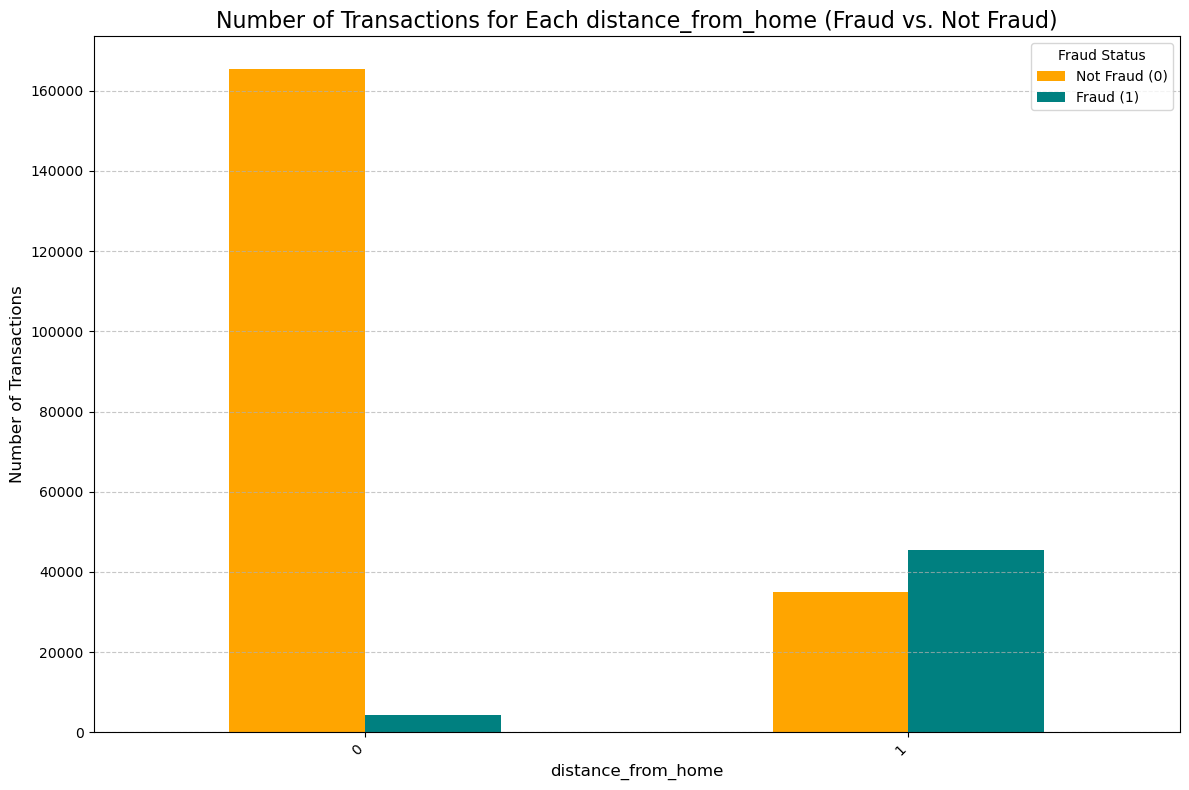

In [17]:
category_column = 'distance_from_home'

grouped_data = sample.groupby([category_column, 'is_fraud']).size().reset_index(name='count')

pivot_data = grouped_data.pivot(index=category_column, columns='is_fraud', values='count').fillna(0)

pivot_data.columns = ['Not Fraud (0)', 'Fraud (1)']

pivot_data.plot(kind='bar', stacked=False, figsize=(12, 8), color=['orange', 'teal'])

plt.title(f'Number of Transactions for Each {category_column} (Fraud vs. Not Fraud)', fontsize=16)
plt.xlabel(category_column, fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fraud Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


As you can see from the graph the farther you are from home the more likely the transaction is fraud

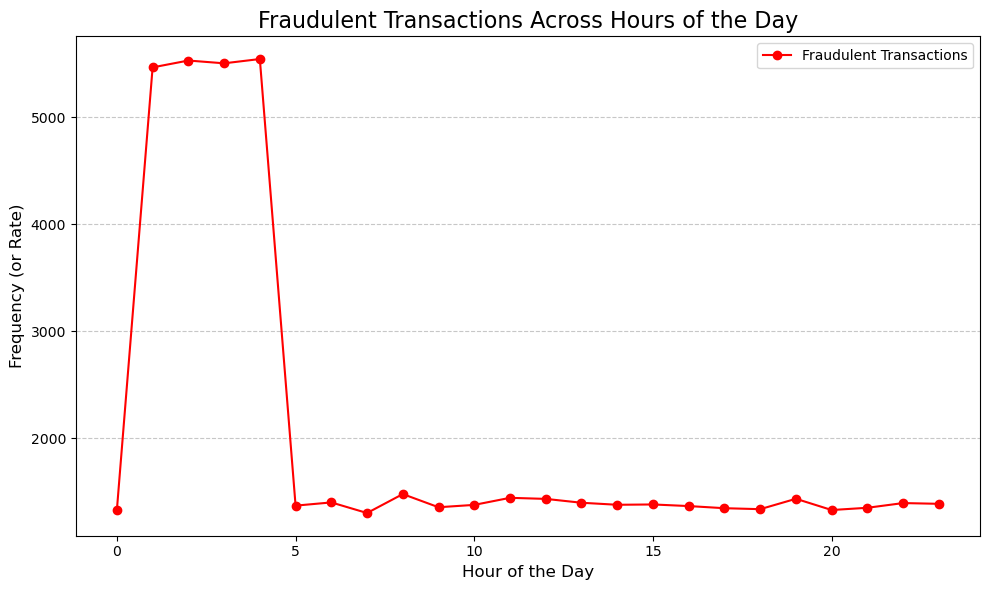

In [18]:
fraud_by_hour = sample[sample['is_fraud'] == 1].groupby('transaction_hour').size()

total_by_hour = sample.groupby('transaction_hour').size()

plt.figure(figsize=(10, 6))
fraud_by_hour.plot(kind='line', marker='o', color='red', label='Fraudulent Transactions')

plt.title('Fraudulent Transactions Across Hours of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Frequency (or Rate)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

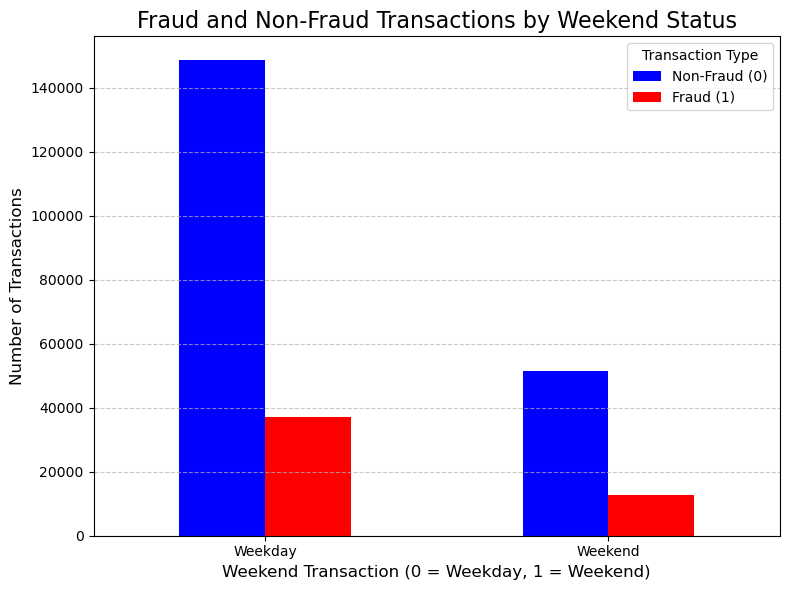

In [19]:
weekend_fraud = sample.groupby(['weekend_transaction', 'is_fraud']).size().reset_index(name='count')

weekend_pivot = weekend_fraud.pivot(index='weekend_transaction', columns='is_fraud', values='count').fillna(0)
weekend_pivot.columns = ['Non-Fraud (0)', 'Fraud (1)']

weekend_pivot.plot(kind='bar', figsize=(8, 6), color=['blue', 'red'])

plt.title('Fraud and Non-Fraud Transactions by Weekend Status', fontsize=16)
plt.xlabel('Weekend Transaction (0 = Weekday, 1 = Weekend)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], rotation=0)
plt.legend(title='Transaction Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/5t/khfsdl654wqgqlyj65ptcvgw0000gp/T/ipykernel_5863/732006053.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_amount_counts.index, y=fraud_amount_counts.values, palette='Reds')


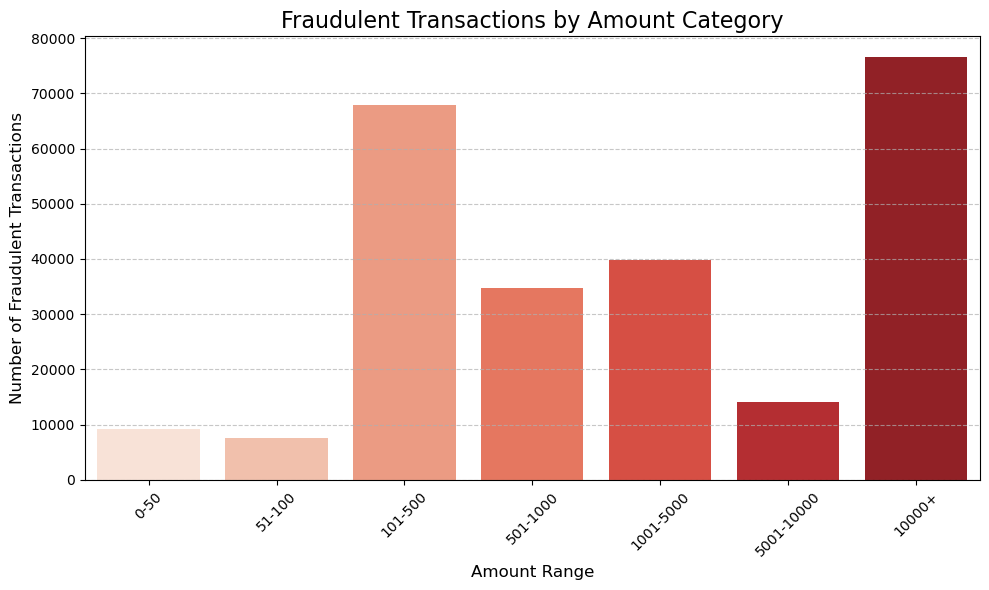

In [20]:
bins = [0, 50, 100, 500, 1000, 5000, 10000, float('inf')]
labels = ['0-50', '51-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10000+']

# Create a new column 'amount_category' based on the bins
sample['amount_category'] = pd.cut(sample['amount'], bins=bins, labels=labels)

# Count the number of fraudulent transactions in each category
fraud_amount_counts = sample['amount_category'].value_counts()

# Plot a bar graph for fraud transactions by amount category
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_amount_counts.index, y=fraud_amount_counts.values, palette='Reds')

# Add titles and labels
plt.title('Fraudulent Transactions by Amount Category', fontsize=16)
plt.xlabel('Amount Range', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_features = [
    'num_transactions', 'total_amount', 'unique_merchants',
    'unique_countries', 'max_single_amount'
]

# Calculate VIF
X = sample[numerical_features]
X = X.fillna(0)  # Handle missing values (if any)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

sample['transaction_diversity'] = sample['unique_merchants'] / (sample['num_transactions'] + 1)

numerical_features = [
    'num_transactions', 'total_amount',
    'transaction_diversity', 'max_single_amount'
]

# Calculate VIF
X = sample[numerical_features]
X = X.fillna(0)  # Handle missing values (if any)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

             Feature        VIF
0   num_transactions   5.443724
1       total_amount   1.933122
2   unique_merchants  49.864462
3   unique_countries  36.337352
4  max_single_amount   3.854857
                 Feature       VIF
0       num_transactions  3.289582
1           total_amount  1.918665
2  transaction_diversity  1.304706
3      max_single_amount  3.163730


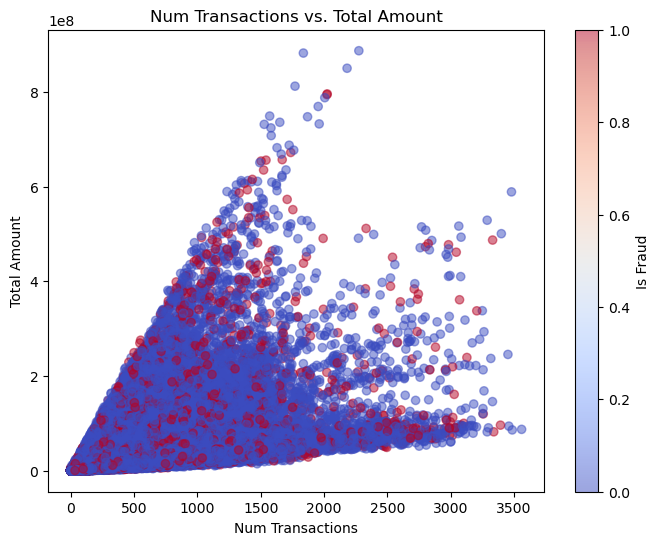

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(sample['num_transactions'], sample['total_amount'], alpha=0.5, c=sample['is_fraud'], cmap='coolwarm')
plt.title('Num Transactions vs. Total Amount')
plt.xlabel('Num Transactions')
plt.ylabel('Total Amount')
plt.colorbar(label='Is Fraud')
plt.show()

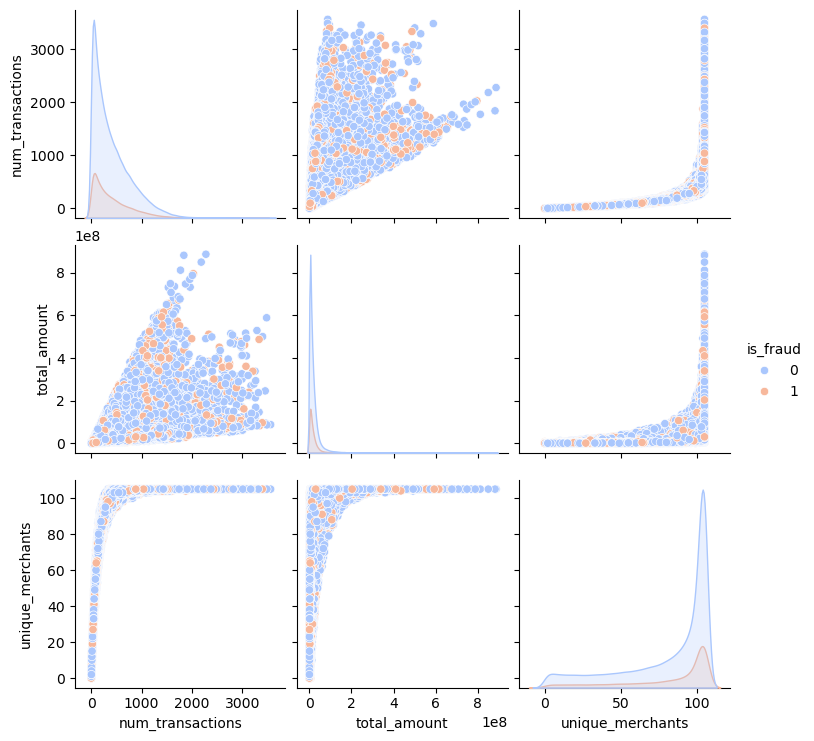

In [23]:
sns.pairplot(
    sample[['num_transactions', 'total_amount', 'unique_merchants', 'is_fraud']],
    hue='is_fraud',
    palette='coolwarm',
    diag_kind='kde'
)
plt.show()

In [24]:
fraud_rates_card_present = sample.groupby('card_present')['is_fraud'].mean()
print(fraud_rates_card_present)

card_present
0    0.122648
1    1.000000
Name: is_fraud, dtype: float64


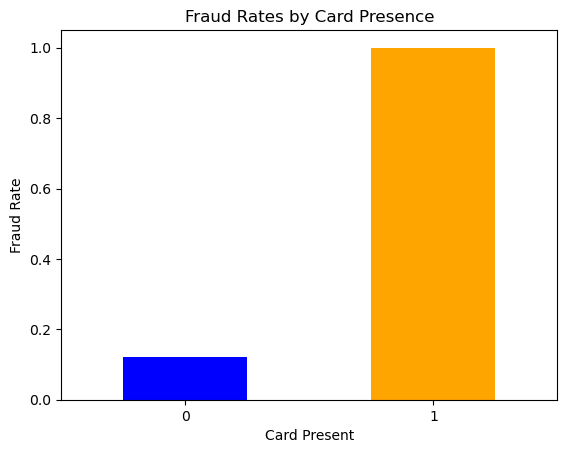

In [25]:
fraud_rates_card_present.plot(kind='bar', color=['blue', 'orange'])
plt.title('Fraud Rates by Card Presence')
plt.ylabel('Fraud Rate')
plt.xlabel('Card Present')
plt.xticks(rotation=0)
plt.show()

Since we decided to highlight country as one of our important features. 

In [26]:
fraud_country = pd_categorical[pd_categorical['is_fraud'] == 1]
fraud_country_grouped = fraud_country.groupby(['country', 'is_fraud'])['amount'].median().reset_index()
ranked_country = fraud_country_grouped.sort_values(by='amount', ascending=False).reset_index(drop=True)
ranked_country

,country,is_fraud,amount
0,Nigeria,True,294516.610
1,Japan,True,83717.120
2,Russia,True,56978.935
3,Mexico,True,14976.800
4,Brazil,True,3811.930
5,Australia,True,964.510
6,Canada,True,954.245
7,Singapore,True,937.950
8,USA,True,707.840
9,Germany,True,690.450


We found that the top 4 countries with the highest amount of fraud detected were: Nigeria, Japan, Russia, and Mexico. We decided to pick these four due to how high the amounts were compared to other countries.

/var/folders/5t/khfsdl654wqgqlyj65ptcvgw0000gp/T/ipykernel_5863/675984055.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data = country_vis, x = 'country', y = 'amount', hue = 'is_fraud', palette = sns.color_palette("viridis"))


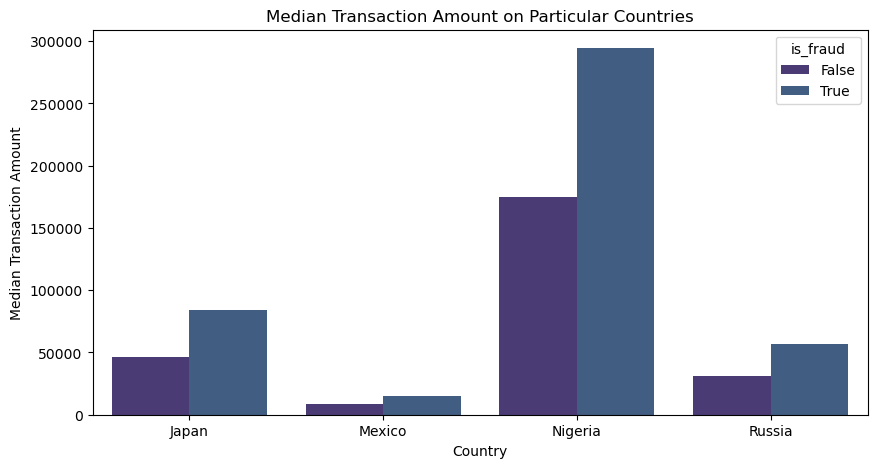

In [27]:
country_specific = pd_categorical[pd_categorical['country'].isin(['Russia', 'Nigeria', 'Japan', 'Mexico'])]
country_vis = country_specific.groupby(['country','is_fraud'])['amount'].agg('median').reset_index()
country_vis

plt.figure(figsize=(10,5))
sns.barplot(data = country_vis, x = 'country', y = 'amount', hue = 'is_fraud', palette = sns.color_palette("viridis"))
plt.title("Median Transaction Amount on Particular Countries")
plt.xlabel('Country')
plt.ylabel('Median Transaction Amount')
plt.show()

number of abnormal transactions in Nigeria :270139


/var/folders/5t/khfsdl654wqgqlyj65ptcvgw0000gp/T/ipykernel_5863/2165583713.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud',
/var/folders/5t/khfsdl654wqgqlyj65ptcvgw0000gp/T/ipykernel_5863/2165583713.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud',


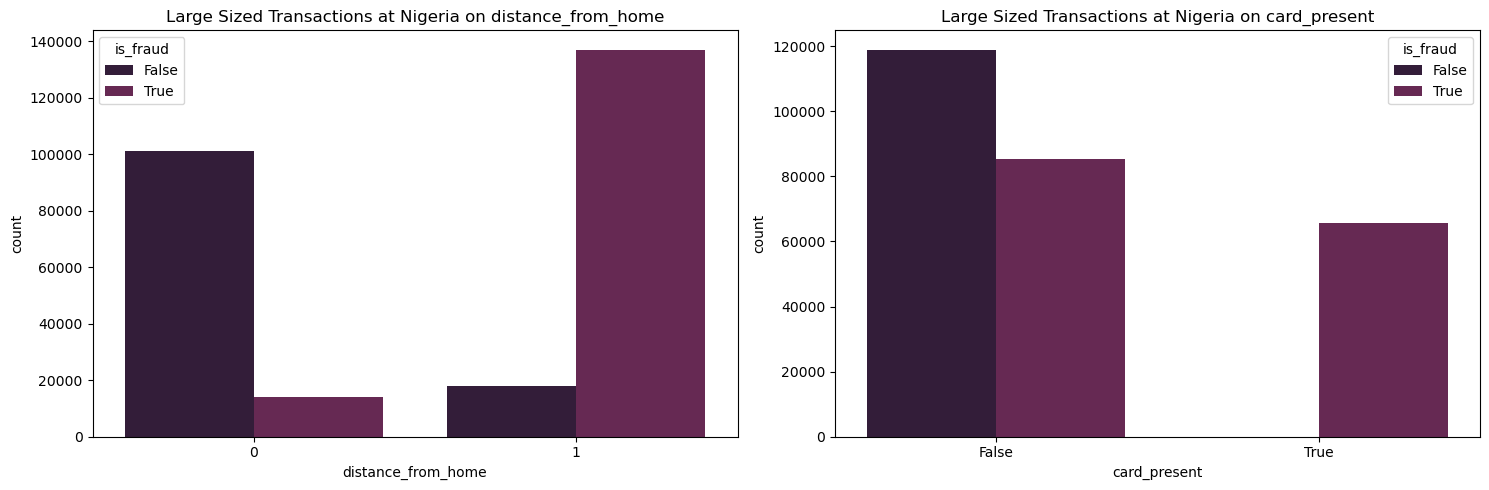

In [28]:
nigeria_high_amount = df[(df['country'] == 'Nigeria') & (df['amount'] > 294516)]
print(f'number of abnormal transactions in Nigeria :{nigeria_high_amount.shape[0]}')

cols = ['distance_from_home', 'card_present']

fig, axes = plt.subplots(1,2, figsize = (15,5))
for i, col in enumerate(cols):
    tmp_data = nigeria_high_amount[[col, 'is_fraud']].value_counts().reset_index()
    sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud',
    palette = sns.color_palette('rocket'), ax = axes[i])
    axes[i].set_title(f'Large Sized Transactions at Nigeria on {col}')
    
plt.tight_layout()
plt.show()

number of abnormal transactions in Japan : 120193


/var/folders/5t/khfsdl654wqgqlyj65ptcvgw0000gp/T/ipykernel_5863/3783204104.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('mako'), ax = axes[i])
/var/folders/5t/khfsdl654wqgqlyj65ptcvgw0000gp/T/ipykernel_5863/3783204104.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('mako'), ax = axes[i])


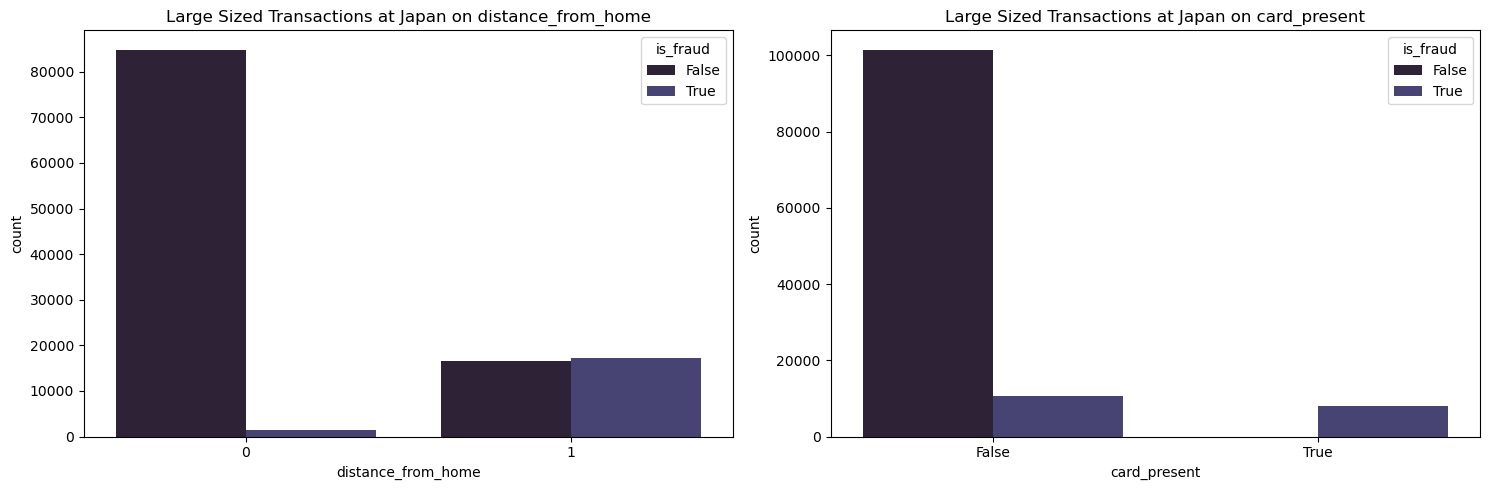

In [29]:
japan_high_amount = df[(df['country'] == 'Japan') & (df['amount'] > 83717)]
print(f'number of abnormal transactions in Japan : {japan_high_amount.shape[0]}')

cols = ['distance_from_home', 'card_present']

fig, axes = plt.subplots(1,2, figsize = (15,5))
for i, col in enumerate(cols):
    tmp_data = japan_high_amount[[col, 'is_fraud']].value_counts().reset_index()
    sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('mako'), ax = axes[i])
    axes[i].set_title(f'Large Sized Transactions at Japan on {col}')
    
plt.tight_layout()
plt.show()

number of abnormal transactions in Russia : 241867


/var/folders/5t/khfsdl654wqgqlyj65ptcvgw0000gp/T/ipykernel_5863/2560148670.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('crest'), ax = axes[i])
/var/folders/5t/khfsdl654wqgqlyj65ptcvgw0000gp/T/ipykernel_5863/2560148670.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('crest'), ax = axes[i])


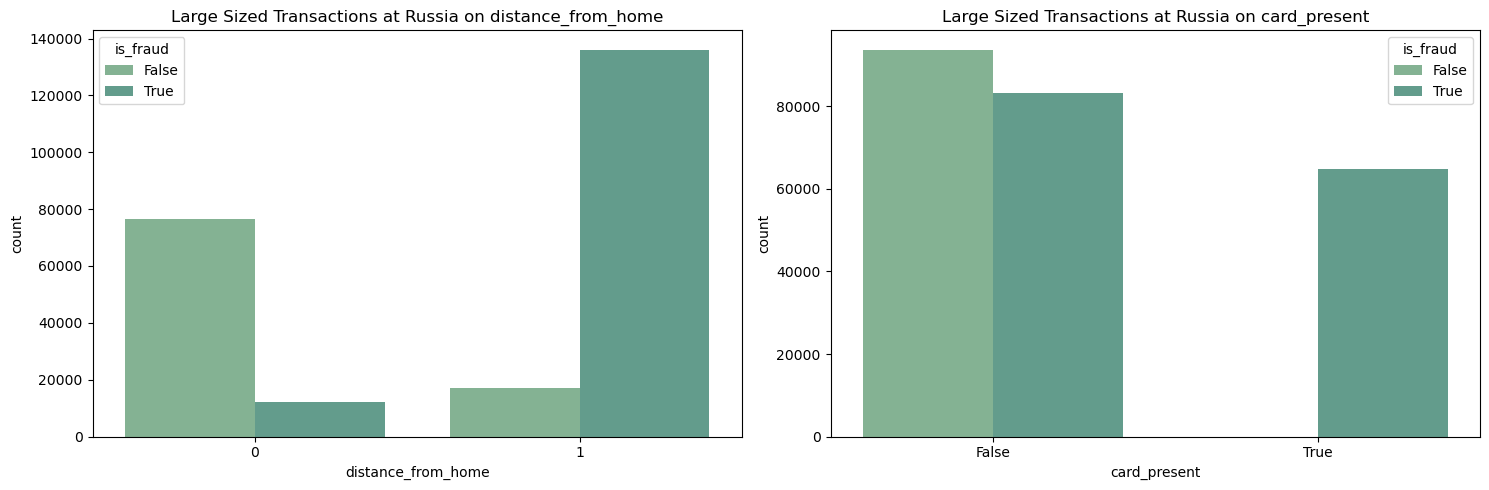

In [30]:
russia_high_amount = df[(df['country'] == 'Russia') & (df['amount'] > 56978)]
print(f'number of abnormal transactions in Russia : {russia_high_amount.shape[0]}')

cols = ['distance_from_home', 'card_present']

fig, axes = plt.subplots(1,2, figsize = (15,5))
for i, col in enumerate(cols):
    tmp_data = russia_high_amount[[col,'is_fraud']].value_counts().reset_index()
    sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('crest'), ax = axes[i])
    axes[i].set_title(f'Large Sized Transactions at Russia on {col}')
    
plt.tight_layout()
plt.show()

number of abnormal transactions in Mexico : 241002


/var/folders/5t/khfsdl654wqgqlyj65ptcvgw0000gp/T/ipykernel_5863/3976898031.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('cubehelix'), ax = axes[i])
/var/folders/5t/khfsdl654wqgqlyj65ptcvgw0000gp/T/ipykernel_5863/3976898031.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('cubehelix'), ax = axes[i])


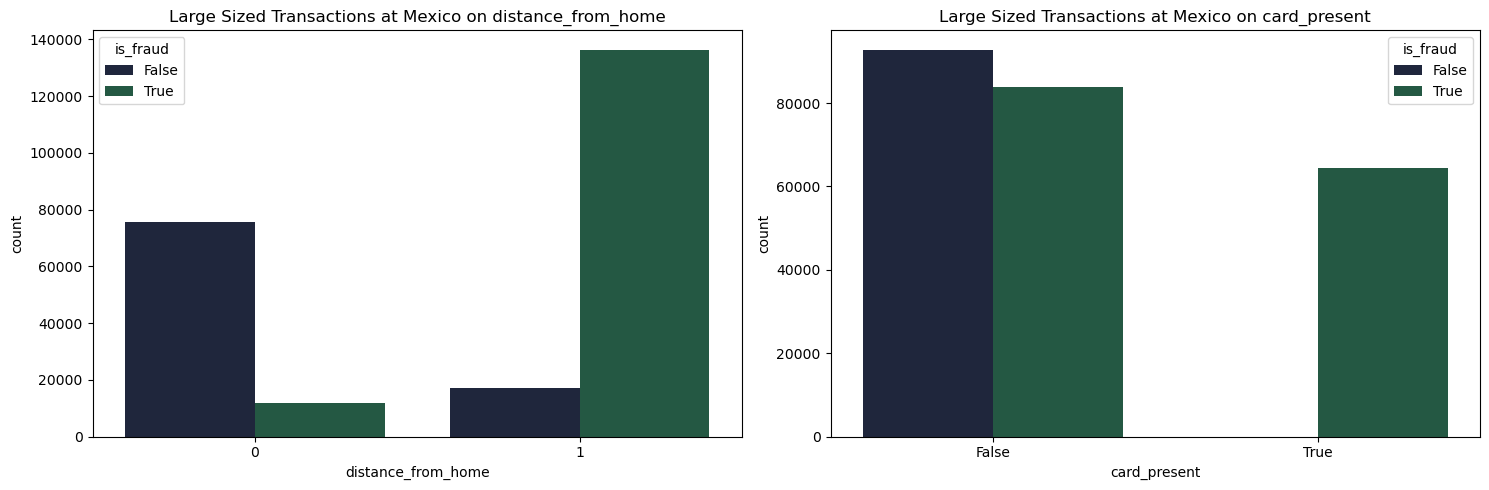

In [31]:
mexico_high_amount = df[(df['country'] == 'Mexico') & (df['amount'] > 14976)]
print(f'number of abnormal transactions in Mexico : {mexico_high_amount.shape[0]}')

cols = ['distance_from_home', 'card_present']

fig, axes = plt.subplots(1,2, figsize = (15,5))
for i, col in enumerate(cols):
    tmp_data = mexico_high_amount[[col, 'is_fraud']].value_counts().reset_index()
    sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('cubehelix'), ax = axes[i])
    axes[i].set_title(f'Large Sized Transactions at Mexico on {col}')
    
plt.tight_layout()
plt.show()

In [32]:
fraudulent = sample[sample['is_fraud'] == 1]
non_fraudulent = sample[sample['is_fraud'] == 0]

/var/folders/5t/khfsdl654wqgqlyj65ptcvgw0000gp/T/ipykernel_5863/2471544914.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraudulent[feature], shade=True, label='Fraudulent', color='red', bw_adjust=0.5)
/var/folders/5t/khfsdl654wqgqlyj65ptcvgw0000gp/T/ipykernel_5863/2471544914.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraudulent[feature], shade=True, label='NonFraudulent', color='blue', bw_adjust=0.5)


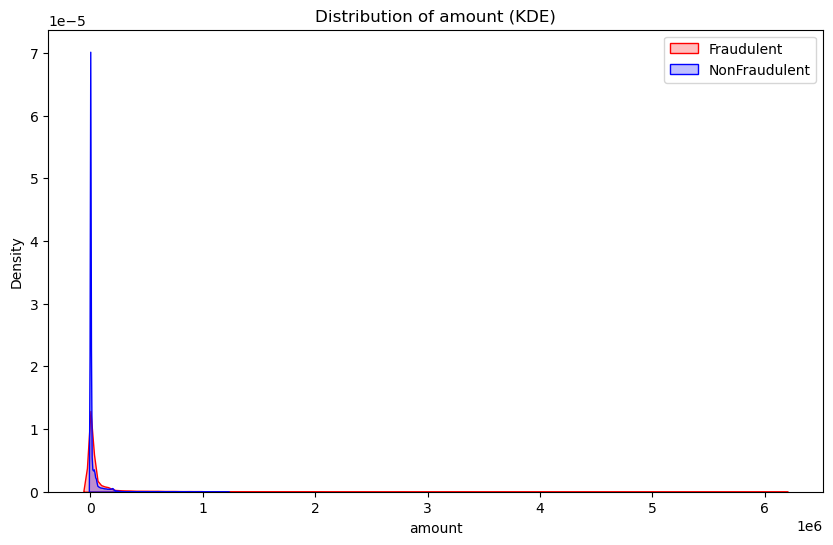

/var/folders/5t/khfsdl654wqgqlyj65ptcvgw0000gp/T/ipykernel_5863/2471544914.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraudulent[feature], shade=True, label='Fraudulent', color='red', bw_adjust=0.5)
/var/folders/5t/khfsdl654wqgqlyj65ptcvgw0000gp/T/ipykernel_5863/2471544914.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraudulent[feature], shade=True, label='NonFraudulent', color='blue', bw_adjust=0.5)


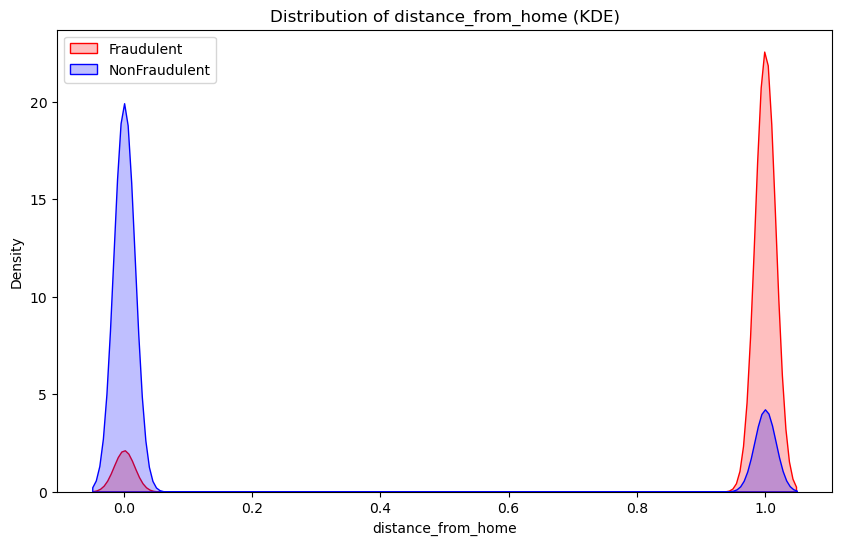

/var/folders/5t/khfsdl654wqgqlyj65ptcvgw0000gp/T/ipykernel_5863/2471544914.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraudulent[feature], shade=True, label='Fraudulent', color='red', bw_adjust=0.5)
/var/folders/5t/khfsdl654wqgqlyj65ptcvgw0000gp/T/ipykernel_5863/2471544914.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraudulent[feature], shade=True, label='NonFraudulent', color='blue', bw_adjust=0.5)


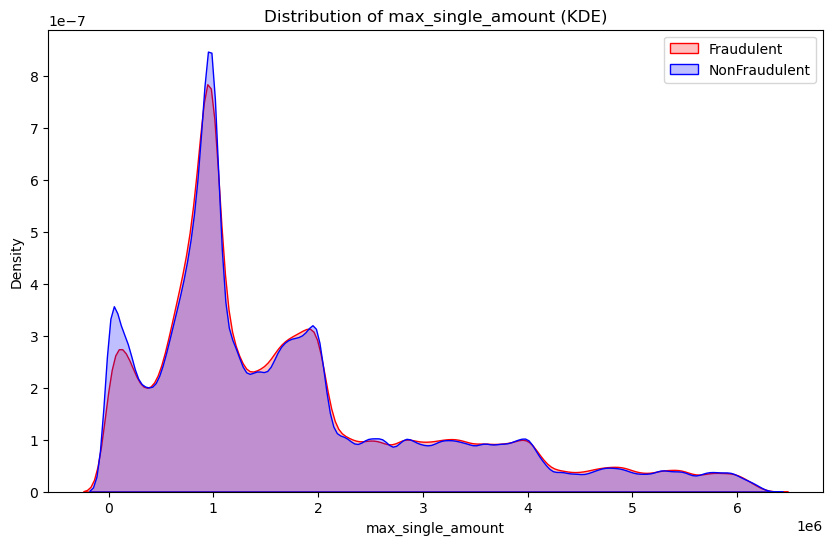

In [33]:
features = ['amount', 'distance_from_home', 'max_single_amount']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(fraudulent[feature], shade=True, label='Fraudulent', color='red', bw_adjust=0.5)
    sns.kdeplot(non_fraudulent[feature], shade=True, label='NonFraudulent', color='blue', bw_adjust=0.5)
    plt.title(f'Distribution of {feature} (KDE)')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

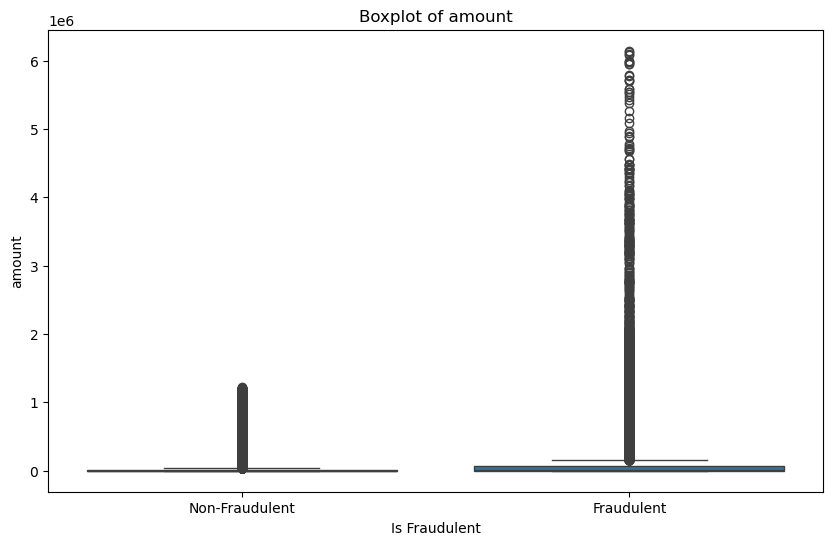

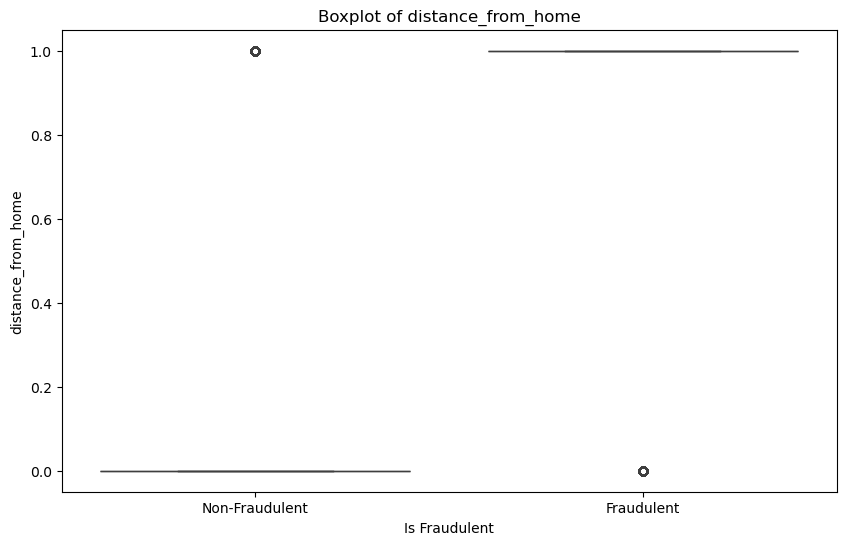

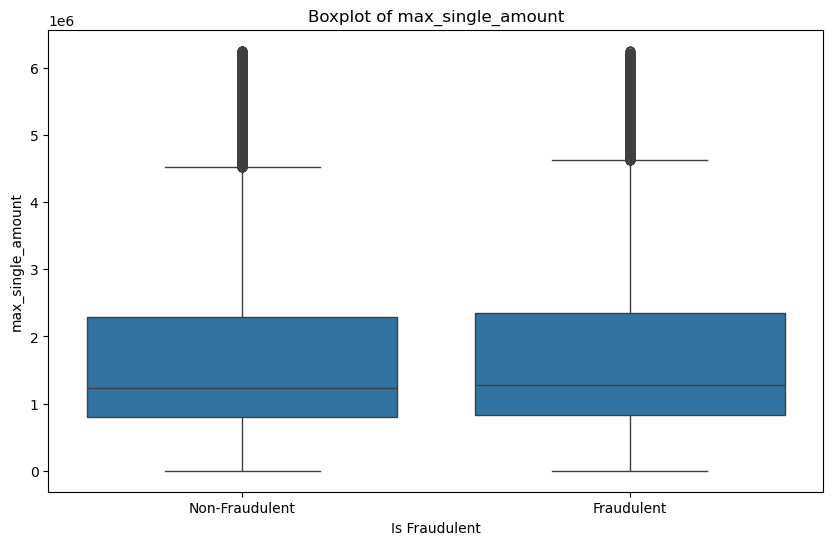

In [34]:
for feature in features:
 plt.figure(figsize=(10, 6))
 sns.boxplot(data= sample, x='is_fraud', y=feature)
 plt.title(f'Boxplot of {feature}')
 plt.xlabel('Is Fraudulent')
 plt.ylabel(feature)
 plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
 plt.show()

In [35]:
sample = sample.drop(columns=['unique_merchants', 'num_transactions', 'timestamp', 'device_fingerprint', 'ip_address', 'amount_category'])

In [36]:
sample.columns

Index(['merchant_type', 'merchant', 'amount', 'currency', 'city', 'city_size',
       'card_present', 'channel', 'distance_from_home', 'high_risk_merchant',
       'transaction_hour', 'weekend_transaction', 'is_fraud', 'total_amount',
       'unique_countries', 'max_single_amount',
       'merchant_category_Entertainment', 'merchant_category_Gas',
       'merchant_category_Grocery', 'merchant_category_Healthcare',
       'merchant_category_Restaurant', 'merchant_category_Retail',
       'merchant_category_Travel', 'country_Brazil', 'country_Canada',
       'country_France', 'country_Germany', 'country_Japan', 'country_Mexico',
       'country_Nigeria', 'country_Russia', 'country_Singapore', 'country_UK',
       'country_USA', 'card_type_Basic Debit', 'card_type_Gold Credit',
       'card_type_Platinum Credit', 'card_type_Premium Debit',
       'device_Chip Reader', 'device_Chrome', 'device_Edge', 'device_Firefox',
       'device_Magnetic Stripe', 'device_NFC Payment', 'device_Safari',


## Data Preprocessing 

* Yes we will scale the data we are using.
  * First we used a correlation matrix to help indentify irrelevant data and select our features we will use for our model.
  * Next, using SKLearn, we split our data into a train/test split.
  * We then used SMOTE to balance our dataset since there is a lot more non-fradulent data than there is actual fraud. 
  * Lastly we scaled our data using MinMaxScaler to help scale the large range of values within our dataset.

In [37]:
selected_features = ['amount', 'merchant_type', 'currency', 'card_present', 'transaction_diversity', 'distance_from_home', 'merchant', 'transaction_hour', 'country_Nigeria', 'country_Japan', 'country_Russia', 'country_Mexico' ]

X = sample.drop(columns=['is_fraud'])
y = sample['is_fraud']

X = X[selected_features]

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200000, 12), (50000, 12), (200000,), (50000,))

In [39]:
# Apply SMOTE
smote = SMOTE(random_state=42, sampling_strategy=0.9)

# Generate new samples for the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(f'Percentage of Fraudulent Transaction : {y_train_smote.value_counts(normalize = True)[0] * 100}%')
print(f'Percentage of Normal Transaction : {y_train_smote.value_counts(normalize = True)[1] * 100}%')

Percentage of Fraudulent Transaction : 52.63171730315517%
Percentage of Normal Transaction : 47.36828269684483%


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

## Machine Learning Approaches


* We will use a logistic regression model as our baseline for this model. Logistic regression is quick and easy to implement and works well with binary classification. 
* We are considering to use gradient boosting or this project as it works well with tabular data and can capture complex patterns and interaction between features.
   * We have decided to use tree-based models such as gradient boosting and random forest since they work very well with tabular data. 


* Describe the methods/datasets (you can have unscaled, selected, scaled version, multiple data farmes) that you ended up using for modeling.
   * Our main dataset we used was our 'sample' data frame which held our relevant and correlated data only after we dropped unneeded features. We then split our data with the 'train_test_split' function which gave us our X and Y train and test splits. Next we put our training data through SMOTE to help balance the amount of fraud to real transactions. Lastly, we scaled our split with a MinMaxScaler to help regulate the value ranges in our training data.

* Make sure to include at least twp models: (1) baseline model, and (2) improvement model(s).  
   * We first used a linear regression model, which preformed poorly with a 39% accuracy. This lead us to then use Logistic Regression as our baseline as it produced an accuracy score of 87%. Logistic regression worked better because our data is non-linear. 
   * For our improvement models, we tested and used both a random forest classifier and XGBoost. We chose these models because they work very well with our non-linear datasets and has binary classification. Random Forest produced an accuracy of 98% and XGBoost had an accuracy of 99%. 


In [41]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_smote,y_train_smote)

LinearRegression()

In [42]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)

print("Test mean squared error (MSE): {:.2f}".format(mse))
print(linear_model.score(X_test,y_test))

Test mean squared error (MSE): 0.09
0.39933594031716635


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

log_reg.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[34686  5473]
 [  935  8906]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.92     40159
           1       0.62      0.90      0.74      9841

    accuracy                           0.87     50000
   macro avg       0.80      0.88      0.83     50000
weighted avg       0.90      0.87      0.88     50000


Accuracy Score:
0.87184


In [44]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train_smote, y_train_smote)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     40159
           1       0.88      0.92      0.90      9841

    accuracy                           0.96     50000
   macro avg       0.93      0.95      0.94     50000
weighted avg       0.96      0.96      0.96     50000

ROC-AUC Score: 0.9878277465608906


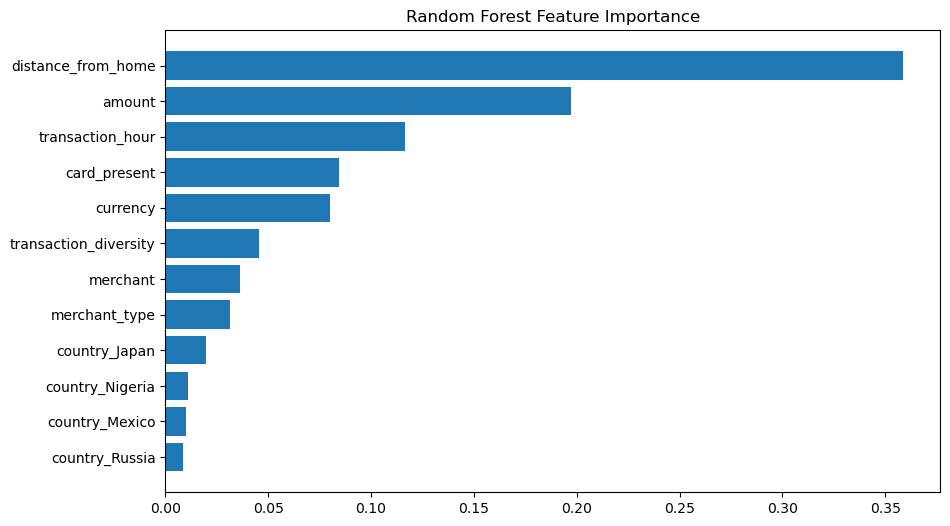

In [45]:
# Feature importance
importance = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [46]:
model = XGBClassifier()
model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]
print('XGBoost: ROC-AUC:', roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     40159
           1       0.89      0.92      0.90      9841

    accuracy                           0.96     50000
   macro avg       0.93      0.95      0.94     50000
weighted avg       0.96      0.96      0.96     50000

XGBoost: ROC-AUC: 0.9900894693010991


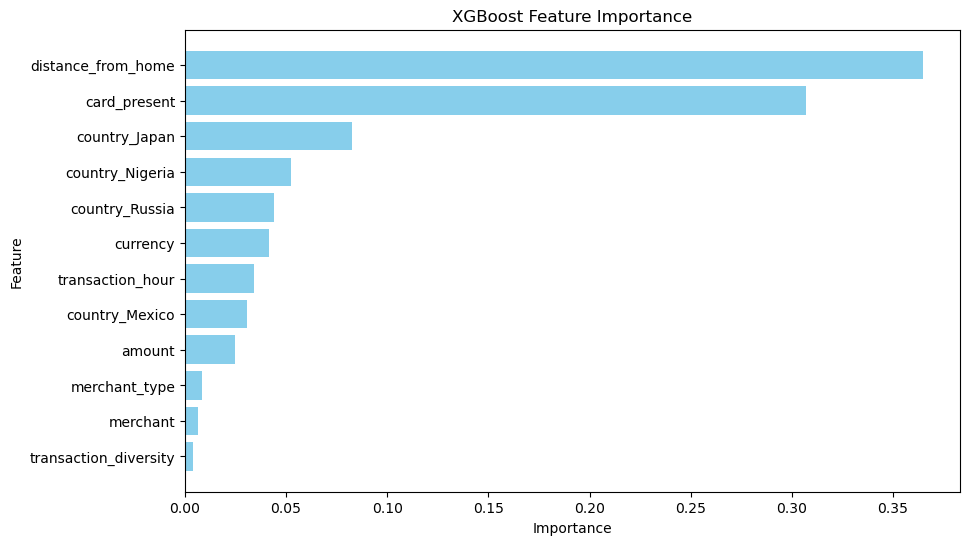

In [48]:
importance = model.feature_importances_

# Create DataFrame with feature names and their importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

## Experiments 

* Thus far we have done correlation and visual analysis so far but plan on doing more experiment for over and undder sampling and the correct scaling for our data.

* We found that there were no null values found within our dataset during the preprocessing phase.

* We found there are more real transactions than fraud within the dataset. With real transaction making up of 5,989,047 and fraud making up of 1,494,719. 

* Some features we found to be important was: "distance_from_home", "amount", "card_present", "country".

* During our Exploratory Data Analysis phase we also saw that the frequency of fraudulent transactions skyrocketed for the first five hours of the day.

* We also found that the top four countries with the highest amount of fraud detected were:
  1. Nigeria
  2. Japan
  3. Russia
  4. Mexico

* We decided to highlight the top four, due to how much larger the amounts were compared to other countries. 

* After balancing the data with SMOTE we ended up with 52.6% fraudulent transactions and 47.4% non-fraudulent transactions.

* We decided to use both Linear Regression and Logistic Regression as our baseline models:
  * When both models were applied to the dataset, we compared their accuracy scores.
  * Linear Regression had an accuracy score of 39.9% and Logistic Regression had an accuracy score of 87.2%. 
  * We think this is due to our dataset being non-linear. Logistic Regression is better for our dataset as it is a machine learning algorithm that performs binary classification tasks, and our dataset is classifying if it is fraud or not_fraud.
  
* For our models we decided to go with XGBoosting and Random Forest:
  * XGBoosting:
    * XGBoosting is a highly efficient, gradient boosting algorithm that excels at handling structured data.
    * The reason why we chose it, is due it being effective for binary classification, like determining if a transaction is fraud or not.
    * Our accuracy score for XGBoosting was quite high, 99%.
    * We suspect that this is due to our data not being quite as balanced as we thought it was, or it could be overfitting.

  * Random Forest:
    * Can capture non-linear relationship between features.
    * Provides feature importance scores, helps identify significant predictors.
    * Can handle both categorical and continuous variables.
    * Our accuracy score for Random Forest was also quite high, 98.8%.
    * We suspect that this could be due to it overfitting, or the data not being balanced enough.




  


* To evaluate our solution we used many evaluation metrics such as recall, precision, and f1 score. By using these metrics, we were able to identify which model performed the best in identifying if a transaction was fradulent or not.
   
* A baseline model is a model used as a reference point for evaluating performance of more complex models. Bassically serves as a benchmark to compare against.
* For our baseline model we decided to use logistic regression as it is very easy to interpret and is good with binary classification. This model gave us a accuracy of 87% which was a solid baseline to go off from. We then implemented XGBoost and random forest, which significantly outperformed our baseline model with an accuracy of 99% and 98% respectively. As demonstrated, our more advanced models was far greater than our baseline model

* Most people used similar models to us however we saw someone use a neural network which had an ever higher accuracy rate than our XGBoost model. The neural network, which used ada boost and gradient boosting to help optimize it, had an accuracy of 99.8%. Most people as mentioned earlier used the same models as us but used different optimization techniques such as boosting and other regularization methods.
 
* Although our logistic regression score was slightly lower than others, our more advanced models, XGBoost and random forest, achieved similar high accuracy results to those who optimized their models effectively.
  * Show graphs/tables with results:
  
* Future improvements we would like to add is first using PCA or t-SNE. This will help reduce the dimensionality of our dataset while preserving important features. This would make our model less susceptible to overfitting and help computational efficiency. Additionally, we aim to incorporate regularization techniques to further prevent overfitting. We believe our model may have been overfitted, so these steps will help ensure it remains robust and generalizes well to new data.


## Conclusion

* What did not work? 
    * Our accuracy scores for XGBoost as well as Random Forest was quite high compared to our baseline model.
* What do you think why? 
    * For the scores, we think that this could be due to the dataset not being balanced enough, or the model could be overfitting. 
* What were approaches, tuning model parameters you have tried?
    * We applied SMOTE to help balance out the dataset. As it had significant more real transactions (not_fraud) compared to actual fraud.
* What features worked well and what didn't? 
    * The features that did not work well included merchant_type, city, customer_id, transaction_id, and ip_address\n",
    * The features that worked very well for us were card_present, distance_from_home, country, and amount
* When describing methods that didn't work, make clear how they failed and any evaluation metrics you used to decide so.
    * Using linear regression did not work at all for us. The model gave us an accuracy of around 30% which is very low so we decided to move to logistic regression for our baseline as it was better for classification tasks.
* How was that a data-driven decision? Be consise, all details can be left in .ipynb
    * The decision to move off the linear regression was due to poor performance and missclassification from our model. When moving to a logistic regression, which handles binary classification better, the model improved thus increasing our baseline accuracy.